In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display plots inline
%matplotlib inline

# Define file path
file_path = 'data/raw/mv_newspapers_articles_202410120953.csv'  

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' does not exist. Please check the path and try again.")
else:
    # Load the dataset
    data = pd.read_csv(file_path)

    # Display the first few rows
    # Convert 'publicate_date' to datetime format
data['publicate_date'] = pd.to_datetime(data['publicate_date'])

# Filter data for the specific date
specific_date = '2024-03-01'
filtered_data = data[data['publicate_date'] == specific_date]

# Reorder columns to place 'amount' before 'id_country'
columns_order = ['tn_id_type_newspaper', 'type_name', 'amount', 'publicate_date' ,'id_country', 'country_name']
filtered_data = filtered_data[columns_order]

# Display the filtered data
display(filtered_data.head())


,tn_id_type_newspaper,type_name,amount,publicate_date,id_country,country_name
0,1,El Tiempo,116,2024-03-01,1,Colombia
225,2,El Espectador,66,2024-03-01,1,Colombia
450,3,Semana,55,2024-03-01,1,Colombia
675,4,El Comercio,99,2024-03-01,2,Ecuador
900,5,El Universo,108,2024-03-01,2,Ecuador


In [29]:
print("\n--- Basic Data Information ---")
data.info()


--- Basic Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_newspaper_article  2700 non-null   int64         
 1   publicate_date        2700 non-null   datetime64[ns]
 2   amount                2700 non-null   int64         
 3   tn_id_type_newspaper  2700 non-null   int64         
 4   type_name             2700 non-null   object        
 5   id_country            2700 non-null   int64         
 6   country_name          2700 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 147.8+ KB


In [28]:
# Step 3: Check for Missing Values
print("\n--- Missing Values ---")
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


--- Missing Values ---
Missing values in each column:
 id_newspaper_article    0
publicate_date          0
amount                  0
tn_id_type_newspaper    0
type_name               0
id_country              0
country_name            0
dtype: int64


In [27]:
# Statistics details about column amount from data frame
amount_summary = data['amount'].describe()

print("\n--- Statistical Summary for 'amount' Column ---")
print(f"Total Count: {amount_summary['count']}")
print(f"Mean (Average): {amount_summary['mean']:.2f}")
print(f"Standard Deviation: {amount_summary['std']:.2f}")
print(f"Minimum: {amount_summary['min']}")
print(f"25th Percentile (Q1): {amount_summary['25%']}")
print(f"Median (50th Percentile, Q2): {amount_summary['50%']}")
print(f"75th Percentile (Q3): {amount_summary['75%']}")
print(f"Maximum: {amount_summary['max']}")


--- Statistical Summary for 'amount' Column ---
Total Count: 2700.0
Mean (Average): 80.01
Standard Deviation: 25.87
Minimum: 30.0
25th Percentile (Q1): 60.0
Median (50th Percentile, Q2): 78.0
75th Percentile (Q3): 103.0
Maximum: 130.0



--- Distribution of 'amount' ---


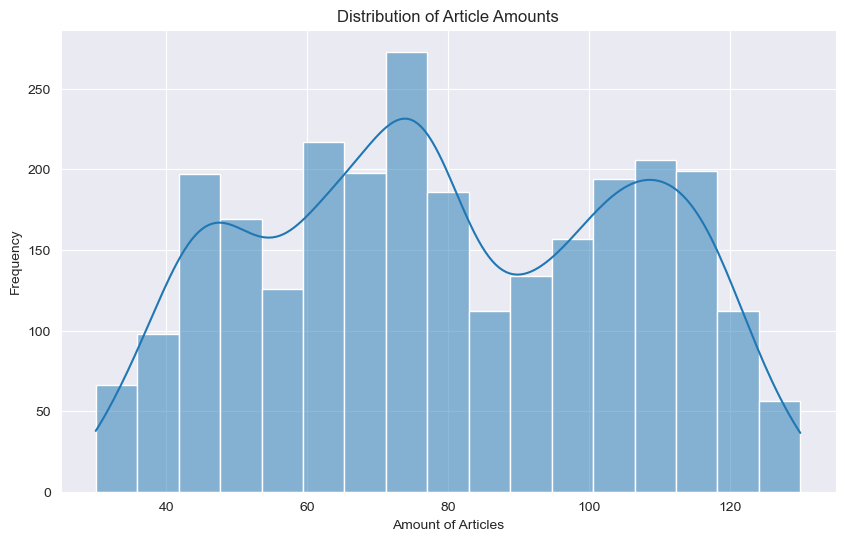

In [26]:
# Step 4: Exploring Distributions of Key Variables
print("\n--- Distribution of 'amount' ---")
# Distribution of 'amount' (number of articles published)
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], kde=True)
plt.title('Distribution of Article Amounts')
plt.xlabel('Amount of Articles')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Este gráfico muestra la distribución de la cantidad de artículos publicados por día.
# A continuación se explican los componentes clave del gráfico:

# Eje X (Cantidad de Artículos):
# - Representa el número de artículos publicados en un día.
# - Los valores en el eje X van desde aproximadamente 40 hasta 120 artículos, mostrando el rango de publicaciones diarias.
# - Cada barra en el gráfico indica la frecuencia de días para un cierto número de artículos publicados.
#   Por ejemplo, si una barra está alineada con el número 70 en el eje X, representa la cantidad de días con cerca de 70 artículos publicados.

# Eje Y (Frecuencia):
# - Representa la frecuencia de días, es decir, cuántas veces ocurre una determinada cantidad de artículos.
# - Los valores en el eje Y van de 0 hasta 250 o más, indicando la cantidad de días que tuvieron un cierto número de artículos.
# - Una barra alta en el eje Y significa que esa cantidad de artículos fue publicada con más frecuencia.
#   Por ejemplo, si la barra en 80 artículos alcanza 250 en el eje Y, significa que hubo 250 días en los que se publicaron alrededor de 80 artículos.

# Barras del Histograma:
# - Cada barra representa el número de días que tuvieron una cantidad específica de artículos, agrupada en intervalos.
# - Las barras más altas indican que esos números de artículos son más comunes, mientras que las barras más bajas indican cantidades menos frecuentes.
# - Agrupar los datos en intervalos ayuda a identificar patrones de frecuencia en lugar de valores exactos.

# Curva de Densidad Suave (Línea Azul):
# - Esta línea sobre el histograma muestra la distribución general de la cantidad de artículos publicados, suavizando los picos y valles de las barras.
# - La curva de densidad resalta la tendencia de los datos, ayudando a visualizar los valores más comunes y los patrones generales.
# - La presencia de picos en la curva alrededor de ciertos valores (como 70 y 100) sugiere que esos son valores comunes o típicos de publicaciones diarias.

# Resumen:
# - El Eje X representa la cantidad de artículos publicados.
# - El Eje Y indica la frecuencia de días con esa cantidad de artículos.
# - Las barras muestran la frecuencia de publicación para cada intervalo de artículos.
# - La curva de densidad proporciona una vista general de la distribución y resalta los patrones en la cantidad de publicaciones diarias.



--- Exploring Articles Published Over Time ---


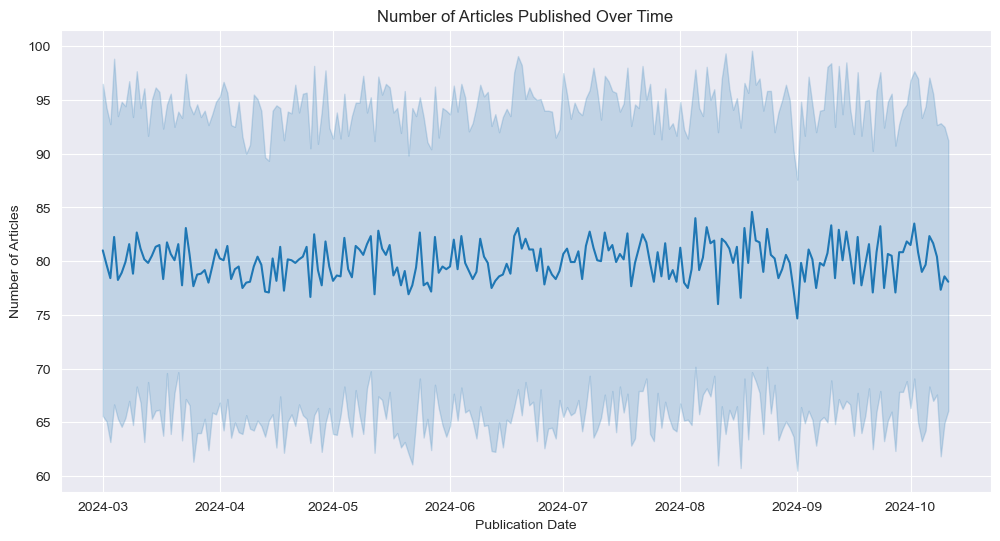

In [30]:
# Step 5: Convert 'publicate_date' to datetime format and explore over time
print("\n--- Exploring Articles Published Over Time ---")
try:
    data['publicate_date'] = pd.to_datetime(data['publicate_date'])
except Exception as e:
    print("Error converting 'publicate_date' to datetime:", e)

# Articles published over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='publicate_date', y='amount', data=data)
plt.title('Number of Articles Published Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
# Este gráfico muestra la cantidad de artículos publicados a lo largo del tiempo, con detalles sobre sus componentes:

# Eje X (Fecha de Publicación):
# - Representa las fechas desde marzo de 2024 hasta octubre de 2024.
# - Permite visualizar cómo varía el número de publicaciones diarias a lo largo de los meses.

# Eje Y (Número de Artículos):
# - Muestra la cantidad de artículos publicados diariamente, con valores que oscilan entre 60 y 100.
# - La escala del eje Y permite identificar las variaciones en las cantidades publicadas.

# Línea Principal:
# - La línea central muestra la cantidad de artículos publicados diariamente.
# - La línea tiene fluctuaciones alrededor de los 80 artículos, lo cual es consistente con el promedio diario.

# Área de Sombra:
# - El área sombreada alrededor de la línea indica la variabilidad en las publicaciones diarias.
# - Esta área refleja la amplitud de las variaciones de la cantidad de artículos. Valores más amplios en la sombra representan mayor variabilidad.
# - Se observan patrones donde el número de artículos sube y baja de forma cíclica, pero sin cambios drásticos.

# Patrones Observados:
# - La cantidad de artículos parece fluctuar regularmente, sin una tendencia clara a aumentar o disminuir con el tiempo.
# - Aunque hay variaciones diarias, el número de artículos publicados se mantiene generalmente en un rango consistente, en torno a los 80 artículos.
# - Los picos y caídas en la línea sugieren que ciertos días o semanas tienen más o menos publicaciones, pero la variabilidad se distribuye de manera bastante uniforme.

# Resumen:
# - Este gráfico indica que la cantidad de artículos publicados día a día es relativamente estable, con un promedio alrededor de 80 artículos.
# - La línea y el área de sombra ayudan a visualizar las variaciones normales en las publicaciones diarias, mostrando que hay fluctuaciones, pero generalmente dentro de un rango constante.


In [31]:
# Step 6: Extracting Additional Features
print("\n--- Extracting Additional Features ---")
# Extract day of the week from publication date
data['day_of_week'] = data['publicate_date'].dt.day_name()
display(data[['publicate_date', 'day_of_week', 'amount']].head())



--- Extracting Additional Features ---


,publicate_date,day_of_week,amount
0,2024-03-01,Friday,116
1,2024-03-02,Saturday,111
2,2024-03-03,Sunday,106
3,2024-03-04,Monday,119
4,2024-03-05,Tuesday,115



--- Articles Published by Day of the Week ---


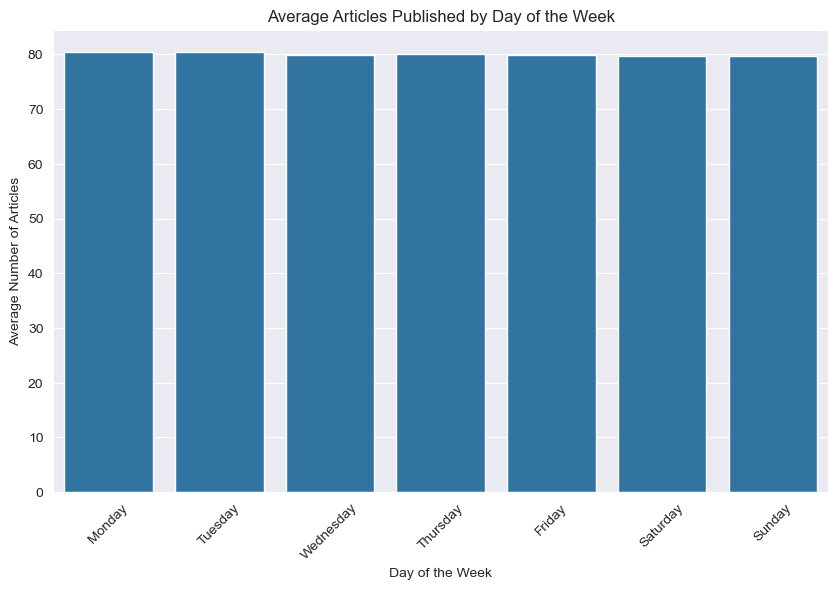

In [32]:
# Step 7: Articles Published by Day of the Week
print("\n--- Articles Published by Day of the Week ---")
# Calculate average articles published by day of the week
avg_articles_by_day = data.groupby('day_of_week')['amount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_articles_by_day.index, y=avg_articles_by_day.values)
plt.title('Average Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Articles')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Este gráfico muestra la cantidad promedio de artículos publicados por día de la semana.
# A continuación se describen sus componentes:

# Eje X (Días de la Semana):
# - Representa los días de la semana, desde lunes hasta domingo.
# - Facilita la comparación de la cantidad promedio de artículos publicados en cada día.

# Eje Y (Promedio de Artículos):
# - Indica el número promedio de artículos publicados por día de la semana.
# - Va de 0 a 80, lo cual muestra que el promedio se mantiene alrededor de 80 artículos diarios para cada día.

# Barras:
# - Cada barra representa el promedio de artículos publicados en ese día específico de la semana.
# - Todas las barras tienen aproximadamente la misma altura, lo que indica que el promedio de publicaciones diarias es constante a lo largo de la semana.

# Resumen:
# - El gráfico sugiere que la cantidad promedio de artículos publicados es estable y consistente durante toda la semana.
# - Con un promedio de alrededor de 80 artículos por día, no hay días con un número de publicaciones significativamente mayor o menor.
